In [116]:
'''
    File name: Titanic_Logistic_Regression
    Author: William Henschell
    Date created: 4/15/2019
    Date last modified: 4/18/2019
    Python Version: Python 3.7
    
    MUST SET FILE PATH FOR DATA *Below Imports*
    Creating a logistic regression model to predict whether or not a Titanic passenger survived
'''

'\n    File name: Titanic_Logistic_Regression\n    Author: William Henschell\n    Date created: 4/15/2019\n    Date last modified: 4/18/2019\n    Python Version: Python 3.7\n    \n    MUST SET FILE PATH FOR DATA *Below Imports*\n    Creating a logistic regression model to predict whether or not a Titanic passenger survived\n'

In [117]:
#Importing pandas, numpy, sklearn methods, pyplot from matplotlib, and seaborn
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
plt.rc('font', size = 14)
import seaborn as sns
sns.set (style = 'white')
sns.set (style = 'whitegrid', color_codes = True)
from statsmodels.graphics.mosaicplot import mosaic

In [118]:
#Reading in Titanic dataset and verifying data was read in properly
titanic = pd.read_csv(r'C:\Users\Will\Desktop\Logistic_Python\data\Titanic.csv', header = 0)
titanic.head()

,Name,Survived,Gender,Age,Traveling_Alone,Ticket_Fare(lbs)
0,"Allen, Miss. Elisabeth Walton",Yes,Female,29.0,Alone,211.3375
1,"Allison, Master. Hudson Trevor",Yes,Male,0.0,Not_Alone,151.5500
2,"Allison, Miss. Helen Loraine",No,Female,2.0,Not_Alone,151.5500
3,"Allison, Mr. Hudson Joshua Creighton",No,Male,30.0,Not_Alone,151.5500
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",No,Female,25.0,Not_Alone,151.5500


In [119]:
#Checking to see that all rows have usable data
print(titanic.count())

Name                1309
Survived            1309
Gender              1309
Age                 1046
Traveling_Alone     1309
Ticket_Fare(lbs)    1304
dtype: int64


In [120]:
#Checking for NA values in the data (as the row counts by column are not all equal...)
print('Survived NA values: ' + str(titanic['Survived'].isnull().sum()))
print('Gender NA values: ' + str(titanic['Gender'].isnull().sum()))
print('Age NA values: ' + str(titanic['Age'].isnull().sum()))
print('Traveling_Alone NA values: ' + str(titanic['Traveling_Alone'].isnull().sum()))
print('Ticket_Fare NA values: ' + str(titanic['Ticket_Fare(lbs)'].isnull().sum()))

Survived NA values: 0
Gender NA values: 0
Age NA values: 263
Traveling_Alone NA values: 0
Ticket_Fare NA values: 5


In [121]:
#Too many NA values in Age to remove them, so replacing them with the median of the data
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

#Verifying
print('Age NA values: ' + str(titanic['Age'].isnull().sum()))

Age NA values: 0


In [122]:
#Looking at remaining rows with NA values (Ticket Fare)
titanic[titanic.isna().any(axis=1)]

,Name,Survived,Gender,Age,Traveling_Alone,Ticket_Fare(lbs)
49,"Cardeza, Mr. Thomas Drake Martinez",Yes,Male,36.0,Not_Alone,NaN
50,"Cardeza, Mrs. James Warburton Martinez (Charlo...",Yes,Female,58.0,Not_Alone,NaN
183,"Lesurer, Mr. Gustave J",Yes,Male,35.0,Alone,NaN
302,"Ward, Miss. Anna",Yes,Female,35.0,Alone,NaN
1225,"Storey, Mr. Thomas",No,Male,60.5,Alone,NaN


In [123]:
#Remove NA values in Ticket_Fare because it's only 5 rows and we can not guess what they paid
titanic = titanic.dropna()

In [124]:
#Rechecking to see that all rows have usable data
print(titanic.count())

Name                1304
Survived            1304
Gender              1304
Age                 1304
Traveling_Alone     1304
Ticket_Fare(lbs)    1304
dtype: int64


In [125]:
#Check correlation between continuous variables
print('Correlation of Ticket_Fare(lbs) and Age: ' + str(titanic['Ticket_Fare(lbs)'].corr(titanic['Age'])))
print('Correlation low enough between Age and Ticket_Fare to ignore any overlapping explanation of survival of a passenger')

Correlation of Ticket_Fare(lbs) and Age: 0.17936675372438093
Correlation low enough between Age and Ticket_Fare to ignore any overlapping explanation of survival of a passenger


C:\Users\qf2830fp\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


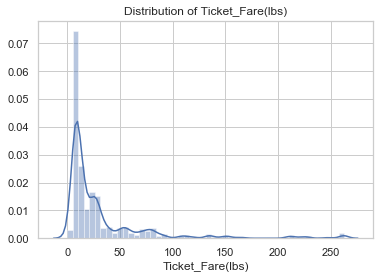

Heavily right skewed


In [126]:
#Looking at distribution of Ticket_Fare
sns.distplot(titanic['Ticket_Fare(lbs)']).set_title('Distribution of Ticket_Fare(lbs)')
plt.show()
print('Heavily right skewed')

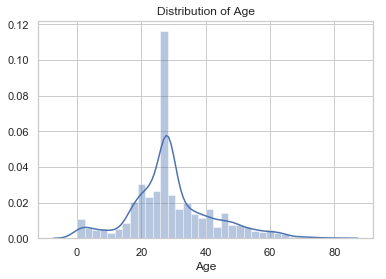

Looks like a fairly normal distribution except for the artificial leptokurtosis from adding median values


In [127]:
#Looking at distribution for Age variable
sns.distplot(titanic['Age']).set_title('Distribution of Age')
plt.show()
print('Looks like a fairly normal distribution except for the artificial leptokurtosis from adding median values')

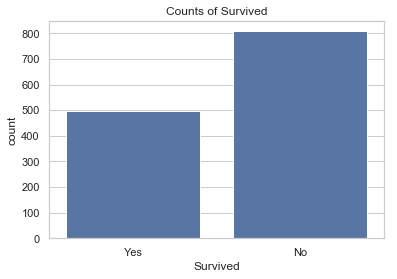

+----+------------+---------+----------+
|    | Survived   |   Count |     Prob |
|----+------------+---------+----------|
|  0 | Yes        |     496 | 0.380368 |
|  1 | No         |     808 | 0.619632 |
|  2 | Total      |    1304 | 1        |
+----+------------+---------+----------+

Odds for Surviving: 0.38 / 0.62 = 0.614
Odds for Not Surviving: 0.62 / 0.38 = 1.629

Here we can see that passengers were 1.63 times more likely to not survive than to survive.


In [128]:
#Look at distribution of Survivors and Non-Survivors to see what's going on with the data
sns.countplot(data = titanic, x='Survived', color = 'b').set_title('Counts of Survived')
plt.show()

#Create count summary for Survived column
survived_count = titanic.groupby('Survived')['Name'].count()
survived_count = survived_count.to_frame().reset_index() #Converting from a Series object to a data frame
survived_count = survived_count.rename(columns={'Name': 'Count'}).sort_values(by = 'Survived', ascending = False) #Sorting data to more easily follow visual

#Create probability of event for survived column
survived_probs = titanic.groupby('Survived').size().div(len(titanic))
survived_probs = survived_probs.to_frame().reset_index()
survived_probs = survived_probs.rename(columns={0: 'Prob'})

#Add the probability to the count data frame for a summary frame
survived_count['Prob']= survived_probs['Prob']

#Add a Totals row to the summary table and rename varaible to survived_summary
total_survived = survived_count.apply(np.sum)
total_survived['Survived'] = 'Total'
survived_summary = survived_count.append(pd.DataFrame(total_survived.values, index=total_survived.keys()).T, ignore_index=True)

#Prints a more organized version of the data frame
print(tabulate(survived_summary, headers='keys', tablefmt='psql'))

#Defining probability variables from the aggregation frame
prob_survived = survived_summary['Prob'][0]
prob_no_survived = survived_summary['Prob'][1]

#Defining odds variables form the probability variables
odds_survived = (prob_survived / prob_no_survived)
odds_no_survived = (prob_no_survived / prob_survived)

#Displaying the odds of Survived
print('\nOdds for Surviving: ' + str(round(prob_survived, 3)) + ' / ' +  str(round(prob_no_survived, 3)) + ' = '+ str(round(odds_survived, 3)))
#Displaying the odds of Not Survived
print('Odds for Not Surviving: ' + str(round(prob_no_survived, 3)) + ' / ' + str(round(prob_survived, 3)) + ' = ' + str(round(odds_no_survived, 3)))

#Printing a summary of the results
print('\nHere we can see that passengers were ' + str(round(odds_no_survived, 2)) + ' times more likely to not survive than to survive.')

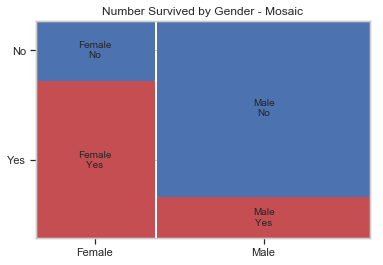

+----+----------+------------+---------+---------------+----------+
|    | Gender   | Survived   |   Count |   Total_Count |     Prob |
|----+----------+------------+---------+---------------+----------|
|  0 | Female   | No         |     127 |           464 | 0.273707 |
|  1 | Female   | Yes        |     337 |           464 | 0.726293 |
|  2 | Male     | No         |     681 |           840 | 0.810714 |
|  3 | Male     | Yes        |     159 |           840 | 0.189286 |
+----+----------+------------+---------+---------------+----------+

Risk Ratio for Males: 0.811 / 0.274 = 2.962
This risk ratio tells us that males are 2.96 times more likely to not survive than females.

Relative Benefit for Females: 0.726 / 0.189 = 3.837
This relative benefit tells us that females are 3.84 times more likely to survive than males.

Odds of Female Survived: 0.726 / 0.274 = 2.654
Odds of Male Survived: 0.189 / 0.811 = 0.233

Odds Ratio for Female Survival vs. Male Survival: 2.654 / 0.233 = 11.365
This 

In [129]:
#Survived by Gender mosaic plot and summary
sbg_props = lambda key: {'color': 'b' if 'No' in key else 'r'} #Coloring by Yes or No
mosaic(titanic, ['Gender', 'Survived'], gap = 0.01, properties = sbg_props, title = 'Number Survived by Gender - Mosaic')
plt.show()

#Create count summary for Survived by Gender
survived_by_gender_summary = titanic.groupby(['Gender', 'Survived'])['Name'].count()
survived_by_gender_summary = survived_by_gender_summary.to_frame().reset_index() #Converting from a Series object to a data frame
survived_by_gender_summary = survived_by_gender_summary.rename(columns={'Name': 'Count'})

#Add totals of the counts by the gender of the person
survived_by_gender_summary.loc[survived_by_gender_summary['Gender'] == 'Female', 'Total_Count'] = survived_by_gender_summary.groupby('Gender')['Count'].sum()[0]
survived_by_gender_summary.loc[survived_by_gender_summary['Gender'] == 'Male', 'Total_Count'] = survived_by_gender_summary.groupby('Gender')['Count'].sum()[1]

#Add probabilites of survival by gender
survived_by_gender_summary['Prob'] = (survived_by_gender_summary['Count']/survived_by_gender_summary['Total_Count'])


#Printing survival by gender summary data frame in a more readable format
print(tabulate(survived_by_gender_summary, headers='keys', tablefmt='psql'))

#Defining probability variables
prob_female_no_survived = survived_by_gender_summary['Prob'][0]
prob_female_survived = survived_by_gender_summary['Prob'][1]
prob_male_no_survived = survived_by_gender_summary['Prob'][2]
prob_male_survived = survived_by_gender_summary['Prob'][3]

#Defining risk ratio and relative benefit for passengers by gender
rr_male = (prob_male_no_survived / prob_female_no_survived)
rb_female = (prob_female_survived / prob_male_survived)

#Defining odds and odds ratio for survival by gender
odds_male_survived = (prob_male_survived / prob_male_no_survived)
odds_female_survived = (prob_female_survived / prob_female_no_survived)
or_male = (odds_male_survived / odds_female_survived)
or_female = (odds_female_survived / odds_male_survived)

#Printing the risk ratio for male passengers (the risk being not survivng)
print('\nRisk Ratio for Males: ' + str(round(prob_male_no_survived, 3)) + ' / ' + str(round(prob_female_no_survived, 3)) + ' = ' + str(round(rr_male, 3)))
print('This risk ratio tells us that males are ' + str(round(rr_male, 2)) + ' times more likely to not survive than females.')

#Printing the relative benefit for female passengers (the benefit being survivng)
print('\nRelative Benefit for Females: ' + str(round(prob_female_survived, 3)) + ' / ' + str(round(prob_male_survived, 3)) + ' = ' + str(round(rb_female, 3)))
print('This relative benefit tells us that females are ' + str(round(rb_female, 2)) + ' times more likely to survive than males.')

#Printing the odds and odds ratio for females that survived compared to males that survived
print('\nOdds of Female Survived: ' + str(round(prob_female_survived, 3)) + ' / ' + str(round(prob_female_no_survived, 3)) + ' = ' + str(round(odds_female_survived, 3)))
print('Odds of Male Survived: ' + str(round(prob_male_survived, 3)) + ' / ' + str(round(prob_male_no_survived, 3)) + ' = ' + str(round(odds_male_survived, 3)))
print('\nOdds Ratio for Female Survival vs. Male Survival: ' + str(round(odds_female_survived, 3)) + ' / ' + str(round(odds_male_survived, 3)) + ' = ' + str(round(or_female, 3)))
print('This odds ratio tells us that female passengers have ' + str(round(or_female, 2)) + ' times higher odds for survival than male passengers.')

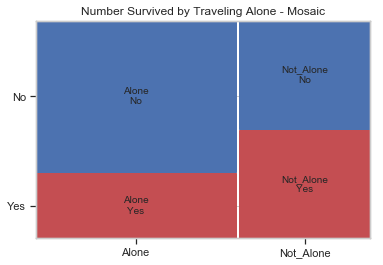

+----+-------------------+------------+---------+---------------+----------+
|    | Traveling_Alone   | Survived   |   Count |   Total_Count |     Prob |
|----+-------------------+------------+---------+---------------+----------|
|  0 | Alone             | No         |     550 |           787 | 0.698856 |
|  1 | Alone             | Yes        |     237 |           787 | 0.301144 |
|  2 | Not_Alone         | No         |     258 |           517 | 0.499033 |
|  3 | Not_Alone         | Yes        |     259 |           517 | 0.500967 |
+----+-------------------+------------+---------+---------------+----------+

Risk Ratio for Traveling Alone: 0.699 / 0.499 = 1.4
This risk ratio tells us that a passenger is 1.4 times more likely to not survive if they are traveling alone as opposed to traveling with someone.

Relative Benefit for Traveling with Someone: 0.501 / 0.301 = 1.664
This relative benefit tells us that a passenger is  1.66 times more likely to survive if they are traveling with so

In [130]:
#Survived by Traveling Alone mosaic plot and summary
sbta_props = lambda key: {'color': 'b' if 'No' in key else 'r'} #Coloring by Yes or No
mosaic(titanic, ['Traveling_Alone', 'Survived'], gap = 0.01, properties = sbta_props, title = 'Number Survived by Traveling Alone - Mosaic')
plt.show()

#Create count summary for Survived by Traveling Alone
survived_by_ta_summary = titanic.groupby(['Traveling_Alone', 'Survived'])['Name'].count()
survived_by_ta_summary = survived_by_ta_summary.to_frame().reset_index() #Converting from a Series object to a data frame
survived_by_ta_summary = survived_by_ta_summary.rename(columns={'Name': 'Count'})

#Add totals of the counts and probabilities by the traveling status of the person
survived_by_ta_summary.loc[survived_by_ta_summary['Traveling_Alone'] == 'Alone', 'Total_Count'] = survived_by_ta_summary.groupby('Traveling_Alone')['Count'].sum()[0]
survived_by_ta_summary.loc[survived_by_ta_summary['Traveling_Alone'] == 'Not_Alone', 'Total_Count'] = survived_by_ta_summary.groupby('Traveling_Alone')['Count'].sum()[1]

#Add probabilites of survival by traveling alone status
survived_by_ta_summary['Prob'] = (survived_by_ta_summary['Count']/survived_by_ta_summary['Total_Count'])

#Printing survival by gender summary data frame in a more readable format
print(tabulate(survived_by_ta_summary, headers='keys', tablefmt='psql'))

#Defining probability variables
prob_alone_no_survived = survived_by_ta_summary['Prob'][0]
prob_alone_survived = survived_by_ta_summary['Prob'][1]
prob_not_alone_no_survived = survived_by_ta_summary['Prob'][2]
prob_not_alone_survived = survived_by_ta_summary['Prob'][3]

#Defining risk ratio and relative benefit for passengers that traveled alone and not alone
rr_alone = (prob_alone_no_survived / prob_not_alone_no_survived)
rb_not_alone = (prob_not_alone_survived / prob_alone_survived)

#Defining odds and odds ratio for survival by gender
odds_alone_survived = (prob_alone_survived / prob_alone_no_survived)
odds_not_alone_survived = (prob_not_alone_survived / prob_not_alone_no_survived)
or_alone = (odds_alone_survived / odds_not_alone_survived)
or_not_alone = (odds_not_alone_survived / odds_alone_survived)

#Printing the risk ratio for traveling alone (the risk being not survivng)
print('\nRisk Ratio for Traveling Alone: ' + str(round(prob_alone_no_survived, 3)) + ' / ' + str(round(prob_not_alone_no_survived, 3)) + ' = ' + str(round(rr_alone, 3)))
print('This risk ratio tells us that a passenger is ' + str(round(rr_alone, 2)) + ' times more likely to not survive if they are traveling alone as opposed to traveling with someone.')

#Printing the relative benefit for not traveling alone (the benefit being survivng)
print('\nRelative Benefit for Traveling with Someone: ' + str(round(prob_not_alone_survived, 3)) + ' / ' + str(round(prob_alone_survived, 3)) + ' = ' + str(round(rb_not_alone, 3)))
print('This relative benefit tells us that a passenger is  ' + str(round(rb_not_alone, 2)) + ' times more likely to survive if they are traveling with someone as opposed to traveling alone.')

#Printing the odds and odds ratio for passengers that traveled with someone compared to passengers that traveled alone
print('\nOdds of Surival for a Passenger Traveling with Someone: ' + str(round(prob_not_alone_survived, 3)) + ' / ' + str(round(prob_not_alone_no_survived, 3)) + ' = ' + str(round(odds_not_alone_survived, 3)))
print('Odds of Survival for a Passenger Traveling Alone: ' + str(round(prob_alone_survived, 3)) + ' / ' + str(round(prob_alone_no_survived, 3)) + ' = ' + str(round(odds_alone_survived, 3)))
print('\nOdds Ratio for Survival of a Passenger Traveling with Someone: ' + str(round(odds_not_alone_survived, 3)) + ' / ' + str(round(odds_alone_survived, 3)) + ' = ' + str(round(or_not_alone, 3)))
print('This odds ratio tells us that passengers who traveled with someone have ' + str(round(or_not_alone, 2)) + ' times higher odds of survival than passengers who traveled alone.')

In [131]:
#Explaining the findings from the two mosaic plots
print('From the two mosaic plots and summaries, it is apparent that Gender is a much better classifying variavle for survival \nthan traveling status because it has a higher odds ratio (meaning that the classifying variable has a larger \ndistinction between the two genders)')

From the two mosaic plots and summaries, it is apparent that Gender is a much better classifying variavle for survival 
than traveling status because it has a higher odds ratio (meaning that the classifying variable has a larger 
distinction between the two genders)


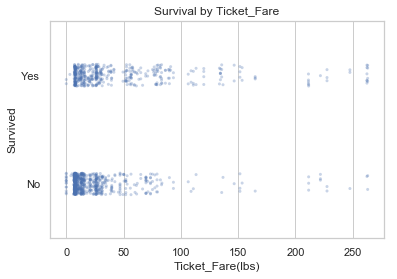

There appears to be more people that survived who paid a higher ticket price, 
and more passengers that did not survive who paid lower ticket fares


In [132]:
#Creating a jitterplot to visualize survival by ticket fare
sns.stripplot(titanic['Ticket_Fare(lbs)'],titanic['Survived'], color= "b", size = 3, alpha = .3).set_title('Survival by Ticket_Fare')
plt.show()
print('There appears to be more people that survived who paid a higher ticket price, \nand more passengers that did not survive who paid lower ticket fares')

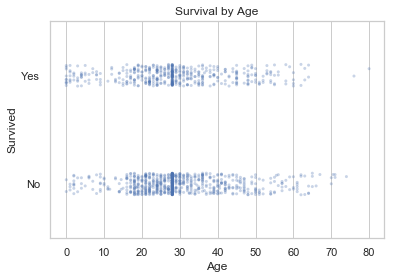

It is not as apparent if Age is a good indicator of survival but it does seem 
that the elderly were more likely to have not survived


In [133]:
#Creating a jitterplot to visualize survival by age
sns.stripplot(titanic['Age'],titanic['Survived'], color= "b", size = 3, alpha = .3).set_title('Survival by Age')
plt.show()
print('It is not as apparent if Age is a good indicator of survival but it does seem \nthat the elderly were more likely to have not survived')

In [134]:
#Changing character-categorical variables into numeric-categorical variables

#Survived
d_survived = {'No':0, 'Yes':1}
titanic['Survived_Y']=titanic['Survived'].apply(lambda x:d_survived[x])

#Gender
d_gender = {'Male':0, 'Female':1}
titanic['Female']=titanic['Gender'].apply(lambda x:d_gender[x])

#Traveling_Alone
d_traveling_alone = {'Not_Alone':0, 'Alone':1}
titanic['Alone']=titanic['Traveling_Alone'].apply(lambda x:d_traveling_alone[x])

In [135]:
#Verifying that character-categorical variables are now numeric-categorical variables
titanic.head()

,Name,Survived,Gender,Age,Traveling_Alone,Ticket_Fare(lbs),Survived_Y,Female,Alone
0,"Allen, Miss. Elisabeth Walton",Yes,Female,29.0,Alone,211.3375,1,1,1
1,"Allison, Master. Hudson Trevor",Yes,Male,0.0,Not_Alone,151.5500,1,0,0
2,"Allison, Miss. Helen Loraine",No,Female,2.0,Not_Alone,151.5500,0,1,0
3,"Allison, Mr. Hudson Joshua Creighton",No,Male,30.0,Not_Alone,151.5500,0,0,0
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",No,Female,25.0,Not_Alone,151.5500,0,1,0


In [136]:
#Setting the target column (if a passenger survived or not)
response_column_names = ['Survived_Y']

In [137]:
#Does ticket_fare alone do a good job of classifying survival?
classifying_column_names = ['Ticket_Fare(lbs)']

In [138]:
#Separating the variables within the dataset
Y = titanic[response_column_names]
X = titanic[classifying_column_names]

In [139]:
#Verifying that data still has no null values (and no new rows)
print('Y Counts\n' + str(Y.count()) + '\n' + '\n' + 'X Counts' + '\n' + str(X.count()))

Y Counts
Survived_Y    1304
dtype: int64

X Counts
Ticket_Fare(lbs)    1304
dtype: int64


In [140]:
#Creating the testing and training sets for the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=5)

In [141]:
#Creating the first logistic model
logmod1 = LogisticRegression(solver='liblinear')
logmod1.fit(X_train, Y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [142]:
#Making predictions with the first logistic model
logmod1_predictions = logmod1.predict(X_test)

In [143]:
#Looking at the classification report for logistic model 1
print(classification_report(Y_test, logmod1_predictions))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82       256
           1       0.83      0.25      0.38       136

   micro avg       0.72      0.72      0.72       392
   macro avg       0.77      0.61      0.60       392
weighted avg       0.75      0.72      0.67       392



In [144]:
#Looking at the confusion matrix for logistic model 1
print(confusion_matrix(Y_test, logmod1_predictions))

[[249   7]
 [102  34]]


In [145]:
#Setting the scores for the first model
logmod1_as = accuracy_score(Y_test, logmod1_predictions)
logmod1_ps = precision_score(Y_test, logmod1_predictions, average = 'weighted')
logmod1_rs = recall_score(Y_test, logmod1_predictions, average = 'weighted')
logmod1_f1s = f1_score(Y_test, logmod1_predictions, average = 'weighted')

In [146]:
#Printing the scores for the first model
print('Model 1 Accuracy Score: ' + str(round(logmod1_as, 4)))
print('Model 1 Precision Score: ' + str(round(logmod1_ps, 4)))
print('Model 1 Recall Score: ' + str(round(logmod1_rs, 4)))
print('Model 1 F-1 Score: ' + str(round(logmod1_f1s, 4)))

Model 1 Accuracy Score: 0.7219
Model 1 Precision Score: 0.751
Model 1 Recall Score: 0.7219
Model 1 F-1 Score: 0.6691


In [147]:
#Adding Female column to the model to see if this improves the model
classifying_column_names = ['Ticket_Fare(lbs)','Female']

#re-creating the Ys and Xs for the machine learning model, and recreating the test and training sets
Y = titanic[response_column_names]
X = titanic[classifying_column_names]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=5)

#Creating the logistic model using Female and Ticket_Fare(lbs)
logmod2 = LogisticRegression(solver='liblinear')
logmod2.fit(X_train, Y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [148]:
#Making predictions with the log(Ticket_Fare) logistic model
logmod2_predictions = logmod2.predict(X_test)

In [149]:
#Printing classification report for second model
print('Classification Report: ')
print(classification_report(Y_test, logmod2_predictions))

#Printing confusion matrix for second model
print('\nConfusion Matrix: ')
print(confusion_matrix(Y_test, logmod2_predictions))

#Printing the accuracy score for the second model
print('\nAccuracy Score: ')
print(accuracy_score(Y_test, logmod2_predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       256
           1       0.67      0.68      0.68       136

   micro avg       0.77      0.77      0.77       392
   macro avg       0.75      0.75      0.75       392
weighted avg       0.77      0.77      0.77       392


Confusion Matrix: 
[[210  46]
 [ 43  93]]

Accuracy Score: 
0.7729591836734694


In [150]:
#Setting the scores for the first model
logmod2_as = accuracy_score(Y_test, logmod2_predictions)
logmod2_ps = precision_score(Y_test, logmod2_predictions, average = 'weighted')
logmod2_rs = recall_score(Y_test, logmod2_predictions, average = 'weighted')
logmod2_f1s = f1_score(Y_test, logmod2_predictions, average = 'weighted')

In [151]:
#Printing the scores for the first model
print('Model 2 Accuracy Score: ' + str(round(logmod2_as, 4)))
print('Model 2 Precision Score: ' + str(round(logmod2_ps, 4)))
print('Model 2 Recall Score: ' + str(round(logmod2_rs, 4)))
print('Model 2 F-1 Score: ' + str(round(logmod2_f1s, 4)))

Model 2 Accuracy Score: 0.773
Model 2 Precision Score: 0.7742
Model 2 Recall Score: 0.773
Model 2 F-1 Score: 0.7735


In [152]:
#Printing results of adding gender to the model
print('Adding gender(female) to the model greatly increased the models classifying ability as it raised:\nAccuracy Score: + ' + str(round(logmod2_as - logmod1_as, 4)) + '\nPrecision Score: + ' + str(round(logmod2_ps - logmod1_ps, 4)) + '\nRecall score: + ' + str(round(logmod2_rs - logmod1_rs, 4)) + '\nF-1 Score: + ' + str(round(logmod2_f1s - logmod1_f1s, 4)))

Adding gender(female) to the model greatly increased the models classifying ability as it raised:
Accuracy Score: + 0.051
Precision Score: + 0.0232
Recall score: + 0.051
F-1 Score: + 0.1045


In [153]:
#Adding Age columns to the second model to see if this improves the model
classifying_column_names = ['Ticket_Fare(lbs)', 'Female', 'Age']

#re-creating the Ys and Xs for the logistic regression model, and recreating the test and training sets
Y = titanic[response_column_names]
X = titanic[classifying_column_names]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=5)

#Creating the logistic model using Age, Female and Ticket_Fare(lbs)
logmod3 = LogisticRegression(solver='liblinear')
logmod3.fit(X_train, Y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [154]:
#Making predictions with the Age, Female, and Ticket_Fare logistic model
logmod3_predictions = logmod3.predict(X_test)

In [155]:
#Printing classification report for third model
print('Classification Report: ')
print(classification_report(Y_test, logmod3_predictions))

#Printing confusion matrix for third model
print('\nConfusion Matrix: ')
print(confusion_matrix(Y_test, logmod3_predictions))

#Printing the accuracy score for the third model
print('\nAccuracy Score: ')
print(accuracy_score(Y_test, logmod3_predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       256
           1       0.67      0.68      0.68       136

   micro avg       0.77      0.77      0.77       392
   macro avg       0.75      0.75      0.75       392
weighted avg       0.77      0.77      0.77       392


Confusion Matrix: 
[[210  46]
 [ 43  93]]

Accuracy Score: 
0.7729591836734694


In [156]:
#Notes about model 3
print('Just by looking at the confusion matrix of the third model and the confusion matrix from the second model \nit is apparent that the second model is just as good as the third model without the need for a third categorizing variable')

Just by looking at the confusion matrix of the third model and the confusion matrix from the second model 
it is apparent that the second model is just as good as the third model without the need for a third categorizing variable


In [157]:
#The fourth logistic model will use Ticket_Fare, Female, and Alone
classifying_column_names = ['Ticket_Fare(lbs)', 'Female', 'Alone']

#re-creating the Ys and Xs for the logistic regression model, and recreating the test and training sets
Y = titanic[response_column_names]
X = titanic[classifying_column_names]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=5)

#Creating the logistic model using Alone, Female and Ticket_Fare(lbs)
logmod4 = LogisticRegression(solver='liblinear')
logmod4.fit(X_train, Y_train.values.ravel())


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [158]:
#Making predictions with the Alone, Female, and Ticket_Fare logistic model
logmod4_predictions = logmod4.predict(X_test)

In [159]:
#Printing classification report for third model
print('Classification Report: ')
print(classification_report(Y_test, logmod4_predictions))

#Printing confusion matrix for third model
print('\nConfusion Matrix: ')
print(confusion_matrix(Y_test, logmod4_predictions))

#Printing the accuracy score for the third model
print('\nAccuracy Score: ')
print(accuracy_score(Y_test, logmod4_predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       256
           1       0.67      0.68      0.68       136

   micro avg       0.77      0.77      0.77       392
   macro avg       0.75      0.75      0.75       392
weighted avg       0.77      0.77      0.77       392


Confusion Matrix: 
[[210  46]
 [ 43  93]]

Accuracy Score: 
0.7729591836734694


In [160]:
#Notes about the fourth model
print('Again, no new classification power has come from adding the new column so the best model without \ninteraction variables is the model with Female and Ticket_Fare(lbs)')

Again, no new classification power has come from adding the new column so the best model without 
interaction variables is the model with Female and Ticket_Fare(lbs)


In [161]:
#Looking at a second degree polynomial model

#This polynomial model will use a full factorial between all four variables
classifying_column_names = ['Ticket_Fare(lbs)', 'Female', 'Age', 'Alone']

#re-creating the Ys and Xs for the second degree polynomial model
Y = titanic[response_column_names]
X = titanic[classifying_column_names]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=5)

#Creating the transformed varaibles for both the training and the test sets
poly2 = preprocessing.PolynomialFeatures(degree = 2)
poly2_X_train = poly2.fit_transform(X_train)
poly2_X_test = poly2.fit_transform(X_test)

#Fitting the model to the training set
poly2mod1 = LogisticRegression(solver='liblinear')
poly2mod1.fit(poly2_X_train, Y_train.values.ravel())

#Running and scoring the model on the test set
print(poly2mod1.score(poly2_X_test, Y_test))

#Results
print("This model does not provide significant change to the classifying ability of the simpler model")

0.7780612244897959
This model does not provide significant change to the classifying ability of the simpler model


In [162]:
#The Best Model: Logistic_Regression model using Ticket_Fare and Gender
logmod2_intercept = logmod2.intercept_[0] #Model Intercept
logmod2_ticket_fare_coef = logmod2.coef_[0][0] #Model ticket fare coefficient
logmod2_female_coef = logmod2.coef_[0][1] #Model is female coefficient
print('Second Logistic Model: Odds[Survived] = ' + str(round(logmod2_intercept, 3)) + ' + ' + str(round(logmod2_ticket_fare_coef, 3)) + '(Ticket_Fare) + ' + str(round(logmod2_female_coef, 3)) + '(Female)')

Second Logistic Model: Odds[Survived] = -1.579 + 0.007(Ticket_Fare) + 2.357(Female)


In [163]:
#Meaning of the model
odds_ticket_fare = np.exp(logmod2_ticket_fare_coef)
odds_female = np.exp(logmod2_female_coef)
print('odds(Ticket_Fare) predicting survival = e^(' + str(round(logmod2_ticket_fare_coef, 3)) + ') = ' + str(round(odds_ticket_fare, 4)))
print('odds(Female) predicting survival = e^(' + str(round(logmod2_female_coef, 3)) + ') = ' + str(round(odds_female, 4)))
print('\nFrom these odds that came from the model we can say two things about our classifying varaibles:')
print('- With gender held constant, each 1 lb increase in ticket fare would result in a 0.7% increase to the odds of survival')
print('- Being female on the titanic would result in a 955.78%  increase to the odds of survival compared to a male who paid the same ticket fare')

odds(Ticket_Fare) predicting survival = e^(0.007) = 1.0073
odds(Female) predicting survival = e^(2.357) = 10.5578

From these odds that came from the model we can say two things about our classifying varaibles:
- With gender held constant, each 1 lb increase in ticket fare would result in a 0.7% increase to the odds of survival
- Being female on the titanic would result in a 955.78%  increase to the odds of survival compared to a male who paid the same ticket fare
